In [2]:
from manim import *
from numpy import linalg as npl
import math
import matplotlib.pyplot as plt
import jupyter_capture_output
from scipy.interpolate import make_interp_spline, BSpline
from multiprocessing import Process

video_scene = " -v WARNING --progress_bar None --disable_caching magnus_Scene"
image_scene = f" -v WARNING --progress_bar None --disable_caching -r {2*427},{2*240}  -s magnus_Scene"

Manim Community v0.16.0.post0

Jupyter Capture Output v0.0.8


In [6]:
# globale Konstanten
g = 9.81
omega = 4               # Winkelgeschwindigkeit
m = 1                   # Masse
A_eff = 2               # effektvive Fläche des Objektes
rho = 1                 # Dichte des Mediums
c_W = 1
R = 1                 

# Systemparameter
C_R = c_W / 2 * rho * A_eff / m
C_M = 2 * R * rho * A_eff / m

In [7]:
def ODE_Magnus(t, y_array, f_array, params):
    v_x = y_array[2]
    v_y = y_array[3]
    f_array[0] = v_x
    f_array[1] = v_y
    f_array[2] = -params['C_R'] * np.sqrt(v_x**2 + v_y**2) * v_x - params['C_M'] * omega * v_y
    f_array[3] = -g - params['C_R'] * np.sqrt(v_x**2 + v_y**2) * v_y + params['C_M'] * omega * v_x
    return


def rk4_step(t, delta_t, y_array, ode, params):
    k1 = np.zeros_like(y_array)
    k2 = np.zeros_like(y_array)
    k3 = np.zeros_like(y_array)
    k4 = np.zeros_like(y_array)
    support = np.zeros_like(y_array)
    ode(t, y_array, k1, params) 

    # Berechnung k1 = f(t, y) * dt und support = y + k1/2
    k1 *= delta_t
    support = y_array + k1 / 2

    # Berechnung k2 = f(t+dt/2, y+k1/2) * dt und support = y + k2/2
    ode(t+delta_t/2, support, k2, params)
    k2 *= delta_t
    support = y_array + k2 / 2

    # Berechnung k3 = f(t+dt/2, y+k2/2) * dt und support = y + k3
    ode(t+delta_t/2, support, k3, params)
    k3 *= delta_t
    support = y_array + k3

    # Berechnung k4 = f(t+dt, y+k2) * dt und y_(i+1)
    ode(t+delta_t, support, k4, params)
    k4 *= delta_t
    y_array += (k1 + 2*k2 + 2*k3 + k4) / 6; 
    return

Output saved by creating file at animations/magnus/magnus.mp4.


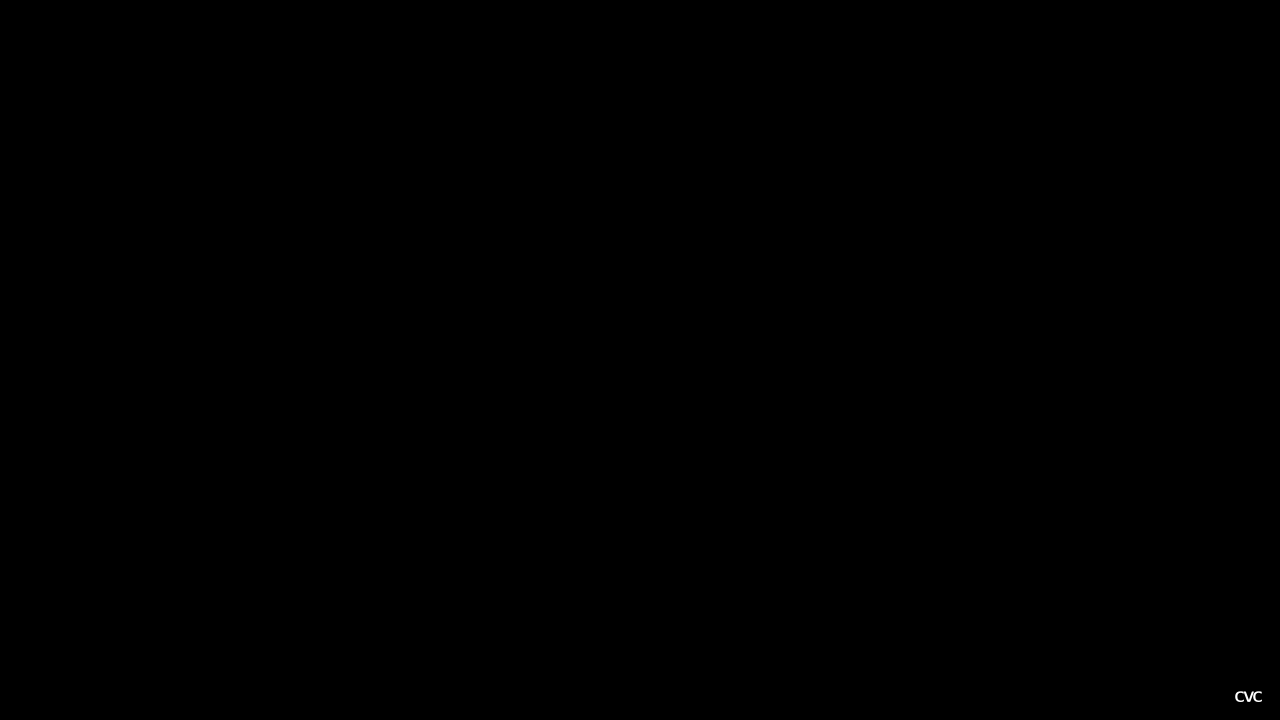

In [4]:
%%capture_video --path "animations/magnus/magnus.mp4"
%%manim -qm --fps 60 $video_scene

class magnus_Scene(Scene):
    def construct(self):
        CVC = Text('CVC', font_size = 12, weight = BOLD, color = WHITE, font = 'Latin Modern Sans').align_on_border(RIGHT + DOWN, buff = 0.2)
        self.add(CVC)